Import Libraries

In [ ]:
!pip install yahoo_fin
!pip install ta
from yahoo_fin import stock_info
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd





Import FORD stock data

In [ ]:
ford_data = stock_info.get_data("F")


In [ ]:
df = ford_data

In [ ]:
df

,open,high,low,close,adjclose,volume,ticker
1972-06-01,0.000000,2.173495,2.149165,2.153220,0.235546,1091238,F
1972-06-02,2.153220,2.173495,2.141055,2.149165,0.235103,1174468,F
1972-06-05,2.149165,2.169440,2.141055,2.149165,0.235103,5209582,F
1972-06-06,2.149165,2.157275,2.116725,2.124835,0.232442,1424158,F
1972-06-07,2.124835,2.137000,2.112670,2.112670,0.231111,675088,F
...,...,...,...,...,...,...,...
2024-04-24,12.940000,13.050000,12.780000,12.950000,12.950000,74510400,F
2024-04-25,12.850000,13.180000,12.630000,13.040000,13.040000,86944100,F
2024-04-26,12.760000,13.020000,12.610000,12.790000,12.790000,57175600,F
2024-04-29,12.810000,12.840000,12.550000,12.750000,12.750000,50285600,F


In [ ]:

ford_data.dropna(inplace=True)


selected_features = ["open", "high", "low", "close", "volume"]


ford_data["ma_50"] = ford_data["close"].rolling(window=50).mean()
ford_data["ma_200"] = ford_data["close"].rolling(window=200).mean()


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(ford_data[selected_features])


X = scaled_features
y = ford_data["close"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
df

,open,high,low,close,adjclose,volume,ticker,ma_50,ma_200
1972-06-01,0.000000,2.173495,2.149165,2.153220,0.235546,1091238,F,NaN,NaN
1972-06-02,2.153220,2.173495,2.141055,2.149165,0.235103,1174468,F,NaN,NaN
1972-06-05,2.149165,2.169440,2.141055,2.149165,0.235103,5209582,F,NaN,NaN
1972-06-06,2.149165,2.157275,2.116725,2.124835,0.232442,1424158,F,NaN,NaN
1972-06-07,2.124835,2.137000,2.112670,2.112670,0.231111,675088,F,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-04-24,12.940000,13.050000,12.780000,12.950000,12.950000,74510400,F,12.5892,12.07305
2024-04-25,12.850000,13.180000,12.630000,13.040000,13.040000,86944100,F,12.5964,12.06210
2024-04-26,12.760000,13.020000,12.610000,12.790000,12.790000,57175600,F,12.6010,12.04995
2024-04-29,12.810000,12.840000,12.550000,12.750000,12.750000,50285600,F,12.6056,12.03775


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)



In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
predictions = rf_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.00012467351478400164


In [ ]:
from datetime import datetime


prediction_date = datetime(2024, 10, 30)
historical_data = stock_info.get_data("F", end_date=prediction_date)


historical_features = scaler.transform(historical_data[selected_features])

predicted_price = rf_model.predict(historical_features[-1:])

print("Predicted stock price for October 30, 2024:", predicted_price[0])



Predicted stock price for October 30, 2024: 36.25310913085937


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


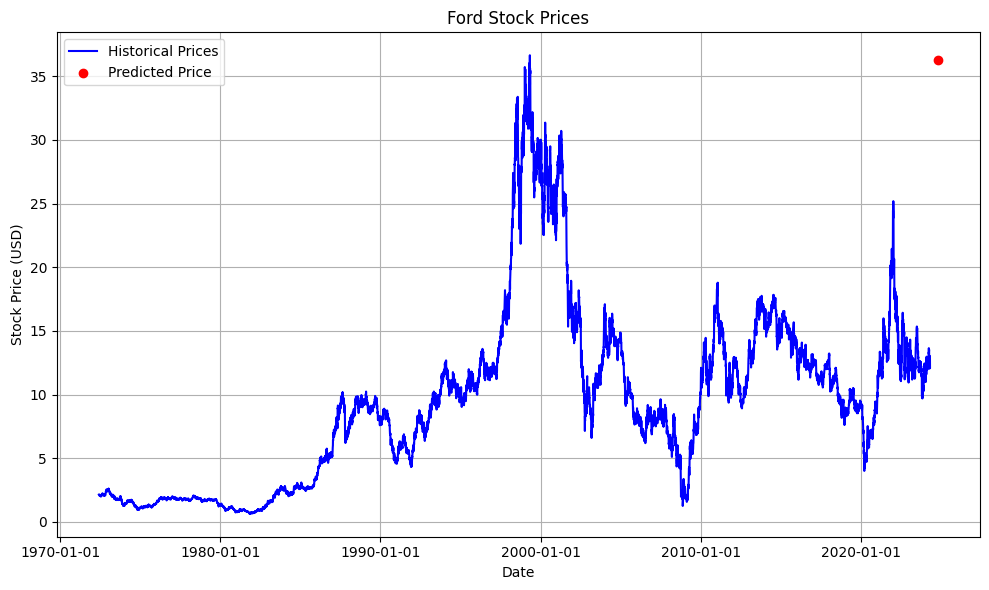

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(10, 6))


plt.plot(historical_data.index, historical_data['close'], label='Historical Prices', color='blue')


plt.scatter(prediction_date, predicted_price, color='red', marker='o', label='Predicted Price')


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


plt.title('Ford Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


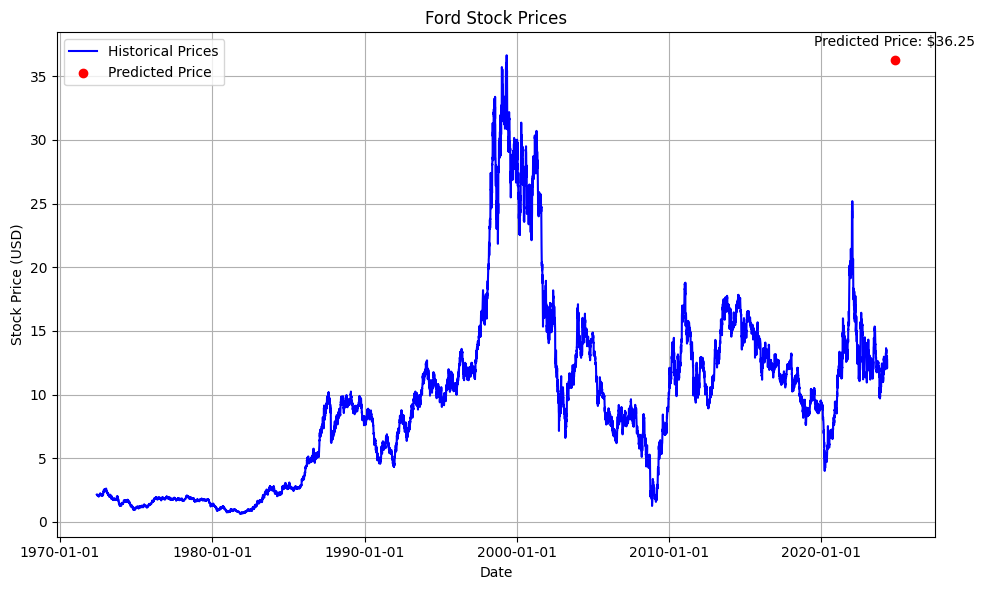

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(10, 6))


plt.plot(historical_data.index, historical_data['close'], label='Historical Prices', color='blue')


plt.scatter(prediction_date, predicted_price, color='red', marker='o', label='Predicted Price')


plt.annotate(f'Predicted Price: ${predicted_price[0]:.2f}',
             (prediction_date, predicted_price),
             textcoords="offset points",
             xytext=(0,10),
             ha='center')


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


plt.title('Ford Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
